In [1]:
!pip install nltk

In [1]:
import nltk
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [4]:
messages=[line.rstrip() for line in open ('smsspamcollection/SMSSpamCollection')]

In [5]:
print(len(messages))

5574


In [6]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [7]:
messages[33]

'ham\tFor fear of fainting with the of all that housework you just did? Quick have a cuppa'

In [8]:
messages[33]

'ham\tFor fear of fainting with the of all that housework you just did? Quick have a cuppa'

In [2]:
for mess_num,message in enumerate(messages[:10]):
    print(mess_num,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [9]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [11]:
import pandas as pd

In [12]:
messages=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [13]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [15]:
grp_by=messages.groupby('label')

In [7]:
grp_by.describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

add the length of messages

In [16]:
messages['Length']=messages['message'].apply(len)

In [17]:
messages.head()

,label,message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='Length', ylabel='Count'>

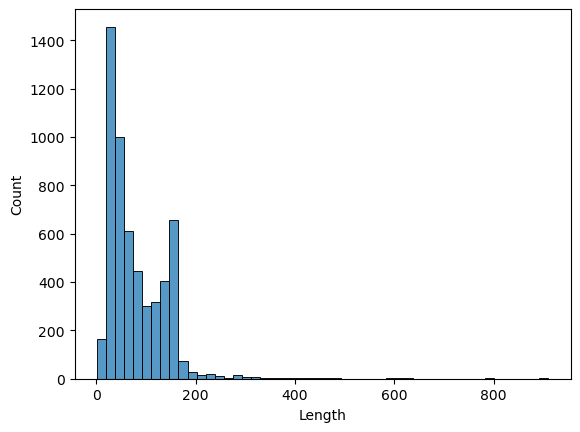

In [19]:
sns.histplot(messages['Length'],bins=50)

<Axes: ylabel='Frequency'>

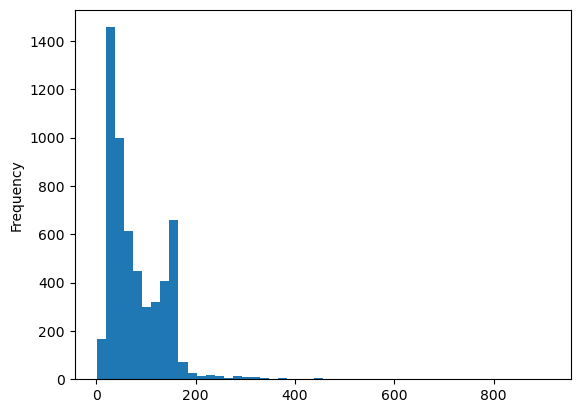

In [20]:
messages['Length'].plot.hist(bins=50)

In [21]:
messages['Length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

# find max length msg using pandas asking

In [22]:
messages[messages['Length']==910]

,label,message,Length
1085,ham,For me the love should start with attraction.i...,910


In [23]:
messages[messages['Length']==910]['message']

1085    For me the love should start with attraction.i...
Name: message, dtype: object

In [24]:
messages[messages['Length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

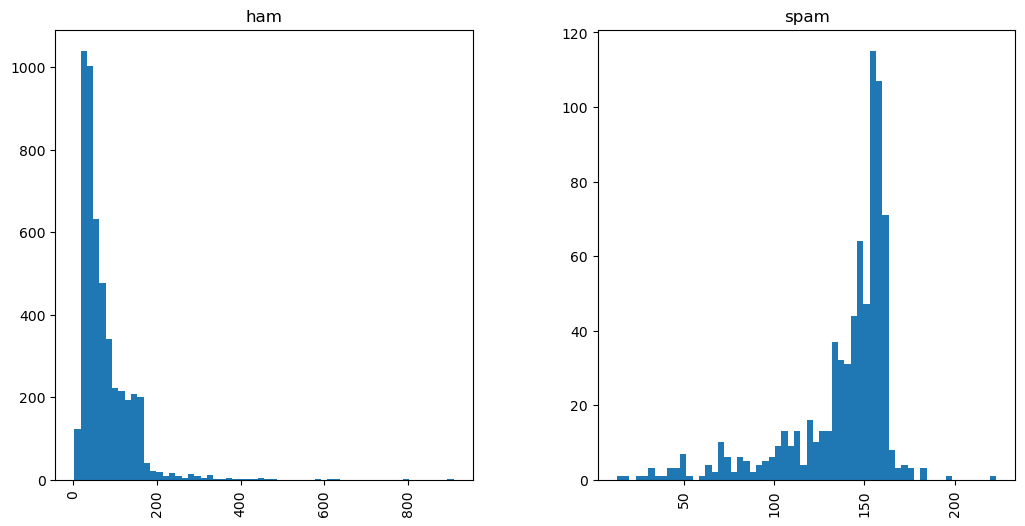

In [25]:
messages.hist(column='Length',by='label',bins=60,figsize=(12,6))

#  Text preprocess

Our main issue with our data is that it is all in text format (strings). The classification algorithms that we've learned about so far will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the bag-of-words approach, where each unique word in a text will be represented by one number.

In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).

As a first step, let's write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', 'a', etc..). To do this we will take advantage of the NLTK library. It's pretty much the standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.

Let's create a function that will process the string in the message column, then we can just use apply() in pandas do process all the text in the DataFrame.

First removing punctuation. We can just take advantage of Python's built-in string library to get a quick list of all the possible punctuation:

In [26]:
import string

In [27]:
mess='Sample message! Notice: it has punctuation.'

In [28]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
nopunc=[c for c in mess if c not in string.punctuation]

In [30]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

Now let's see how to remove stopwords. We can impot a list of english stopwords from NLTK (check the documentation for more languages and info).

In [31]:
from nltk.corpus import stopwords

In [32]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

#  Method of joining list of string

In [46]:
nopunc=''.join(nopunc)

In [47]:
nopunc

'Sample message Notice it has punctuation'

In [35]:
nopunc22= stopwords.words('english')

In [36]:
nopunc22=''.join(nopunc22)

In [37]:
nopunc22

"imemymyselfweouroursourselvesyouyou'reyou'veyou'llyou'dyouryoursyourselfyourselveshehimhishimselfsheshe'sherhersherselfitit'sitsitselftheythemtheirtheirsthemselveswhatwhichwhowhomthisthatthat'llthesethoseamisarewaswerebebeenbeinghavehashadhavingdodoesdiddoingaantheandbutiforbecauseasuntilwhileofatbyforwithaboutagainstbetweenintothroughduringbeforeafterabovebelowtofromupdowninoutonoffoverunderagainfurtherthenonceheretherewhenwherewhyhowallanybotheachfewmoremostothersomesuchnonornotonlyownsamesothantooverystcanwilljustdondon'tshouldshould'venowdllmoreveyainarenaren'tcouldncouldn'tdidndidn'tdoesndoesn'thadnhadn'thasnhasn'thavenhaven'tisnisn'tmamightnmightn'tmustnmustn'tneednneedn'tshanshan'tshouldnshouldn'twasnwasn'twerenweren'twonwon'twouldnwouldn't"

In [48]:
nopunc

'Sample message Notice it has punctuation'

In [49]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

#  remove the stopwords from a list of string

In [50]:
clean_nopunc=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [51]:
clean_nopunc

['Sample', 'message', 'Notice', 'punctuation']

#  make a function for cleaning the message

In [53]:
"""
1. remove punctuations
2. remove stopwords
3. return list of clean text words
"""

def text_process(mess):
    
    # Check characters to see if they are in punctuation
    nopunc= [char for char in mess if char not in string.punctuation]
    
    # Join the characters again to form the string.
    nopuc=''.join(nopunc)
    
    # Now just remove any stopwords
    return [word.lower() for word in nopuc.split() if word.lower() not in stopwords.words('english')]
    
    
    

In [54]:
messages.head()

,label,message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Now let's "tokenize" these messages. Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).

Let's see an example output on on column:

Note: We may get some warnings or errors for symbols we didn't account for or that weren't in Unicode (like a British pound symbol)

# apply the function we created on message column

In [58]:
# Check to make sure its working
messages['message'].head(5).apply(text_process)

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

# Vectorization

For now we will just focus on using what we have to convert our list of words to an actual vector that SciKit-Learn can use.

Each vector will have as many dimensions as there are unique words in the SMS corpus. We will first use SciKit Learn's CountVectorizer. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message.

Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a Sparse Matrix.

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
bag_of_word_transformer=CountVectorizer(analyzer=text_process).fit(messages['message'])

In [70]:
# total number of words in our vacabulary

In [71]:
print(len(bag_of_word_transformer.vocabulary_))

9530


In [72]:
mess4=messages['message'][3]

In [78]:
print(mess4)

U dun say so early hor... U c already then say...


In [74]:
bow4=bag_of_word_transformer.transform([mess4])

In [75]:
print(bow4)

  (0, 1129)	1
  (0, 1910)	1
  (0, 3002)	1
  (0, 3023)	1
  (0, 4219)	1
  (0, 7208)	2
  (0, 8626)	2


In [57]:
print(bow4.shape)

(1, 9530)


In [59]:
bow_transformer.get_feature_names_out()[7208]

'say'

In [76]:
bow_transformer.get_feature_names_out()[8626]

'u'

#  transfrom the dataframe of messages

In [79]:
messages_bow=bag_of_word_transformer.transform(messages['message'])

In [80]:
print('shape of sparse matrix:' ,messages_bow.shape)

shape of sparse matrix: (5572, 9530)


#  number of zero

In [81]:
messages_bow.nnz

50101

In [82]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [83]:
 from sklearn.feature_extraction.text import TfidfTransformer

In [84]:
tfidf_transformer=TfidfTransformer().fit(messages_bow)

In [85]:
tfidf4=tfidf_transformer.transform(bow4)

In [86]:
print(tfidf4)

  (0, 8626)	0.31949158769666564
  (0, 7208)	0.5597000940482765
  (0, 4219)	0.46452762500729494
  (0, 3023)	0.33557436526898854
  (0, 3002)	0.30912546538910485
  (0, 1910)	0.2870370340589675
  (0, 1129)	0.27985004702413824


Inverse document frequency

We'll go ahead and check what is the IDF (inverse document frequency) of the word "u" and of word "university"?

In [87]:
tfidf_transformer.idf_[bag_of_word_transformer.vocabulary_['university']]

8.239394426449646

To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [88]:
messages_tfidf=tfidf_transformer.transform(messages_bow)

In [89]:
print(messages_tfidf.shape)

(5572, 9530)


# Training a model

With messages represented as vectors, we can finally train our spam/ham classifier. Now we can actually use almost any sort of classification algorithms. For a variety of reasons, the Naive Bayes classifier algorithm is a good choice.

In [90]:
from sklearn.naive_bayes import MultinomialNB

In [91]:
spam_detect_model=MultinomialNB().fit(messages_tfidf,messages['label'])

test the model is working correctly or not

In [93]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [94]:
messages['label'][3]

'ham'

test all the messages

In [95]:
predict_all=spam_detect_model.predict(messages_tfidf)

In [96]:
predict_all

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

# Model Evaluation

 Now we want to determine how well our model will do overall on the entire dataset. Let's begin by getting all the predictions:

# Train Test Split

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
msg_train,msg_test,label_train,label_test=train_test_split(messages['message'],messages['label'],test_size=0.3)

In [100]:
print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

3900 1672 5572


Note the default split would have been 30/70.

# Creating a Data Pipeline

Let's run our model again and then predict off the test set. We will use SciKit Learn's pipeline capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use. Let's see an example of how it works:

In [103]:
from sklearn.pipeline import Pipeline

In [107]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [109]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000020EFCE54220>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [110]:
predictions=pipeline.predict(msg_test)

In [111]:
from sklearn.metrics import classification_report

In [112]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1462
        spam       1.00      0.71      0.83       210

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.97      0.96      0.96      1672

